## Mục tiêu:
Với dữ liệu Marketing này, chúng ta sẽ phân tích tình hình chiến lược marketing của công ty và tìm hiểu những vấn đề tồn đọng cũng như đề xuất giải pháp cho CMO (Chief Marketing Officer).

Dữ liệu này gồm thông tin về 2240 khách hàng, dữ liệu về sản phẩm, những chiến lược marketing đã thành công hoặc không hiệu quả và hiệu suất của các kênh bán hàng.

Link data: https://www.kaggle.com/jackdaoud/marketing-data

## Các bước phân tích:
#### 1. Exploratory Data Analysis
- Xử lý null và những outlier
- Kiểm tra các điểm bất thường trong dữ liệu

#### 2. Statistical Analysis
Sử dụng Statistical Hypothesis test từ mô hình Linear Regression để trả lời những nghi vấn sau:
- Những feature nào có tương quan đến số lượng mua tại cửa hàng
- Nước nào hiện đang có tổng đơn hàng hơn các nước còn lại
- Có phải những người mua vàng trên mức trung bình trong 2 năm gần đây sẽ mua hàng nhiều hơn?
- Có phải những người có bằng tiến sĩ và đã kết hôn có tương quan mạnh mẽ đối với việc mua mặt hàng cá (vì omega-3 tốt cho não bộ)

#### 3. Data Visualization
- Chiến lược thành công nhất?
- Khách hàng có thói quen như thế nào?
- Sản phẩm nào tốt nhất?
- Kênh bán hàng đang có hiệu suất kém?

# Tổng quan dữ liệu

In [86]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting graph display 
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('./marketing_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Explorating data analysis

### Data cleaning

In [87]:
# Remove whitespace of column names
df.columns = df.columns.str.replace(' ','')

# Convert Income column to float datatype
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [88]:
# Convert Dt_Customer feature to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Handling missing values

In [89]:
# Identify features containing null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

**Biễu diễn cột *Income* để tìm cách tính toán tốt nhất cho những giá trị Null**
 - Nhận xét:
  - Thu nhập chủ yếu từ 0$ - $100000, có điểm bất thường (outliers)
  - Dùng số trung vị (median) điền vào Null để tránh ảnh hưởng từ outliers

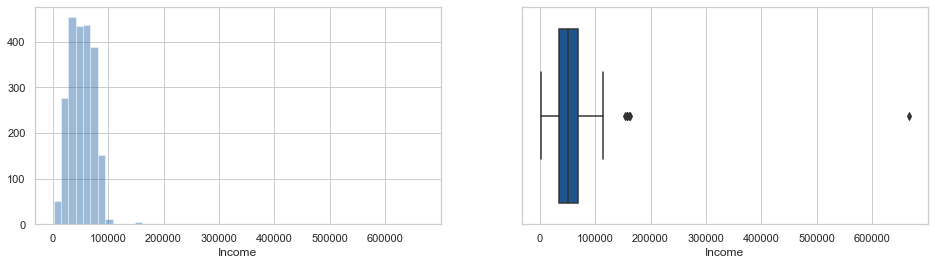

In [90]:
f, axes = plt.subplots(1, 2, figsize=(16,4))
sns.distplot(df['Income'], kde=False, hist=True, ax=axes[0])
sns.boxplot(df['Income'], ax=axes[1])
plt.show()

In [91]:
# Fill null values with median
df['Income'] = df['Income'].fillna(df['Income'].median())

### Outlier data

Xác định những feature chứa outliers
 - Nhận xét:
  - Quan sát thấy cột *Year_Birth* có điểm bất thường, chứa dữ liệu từ 1900 về trước

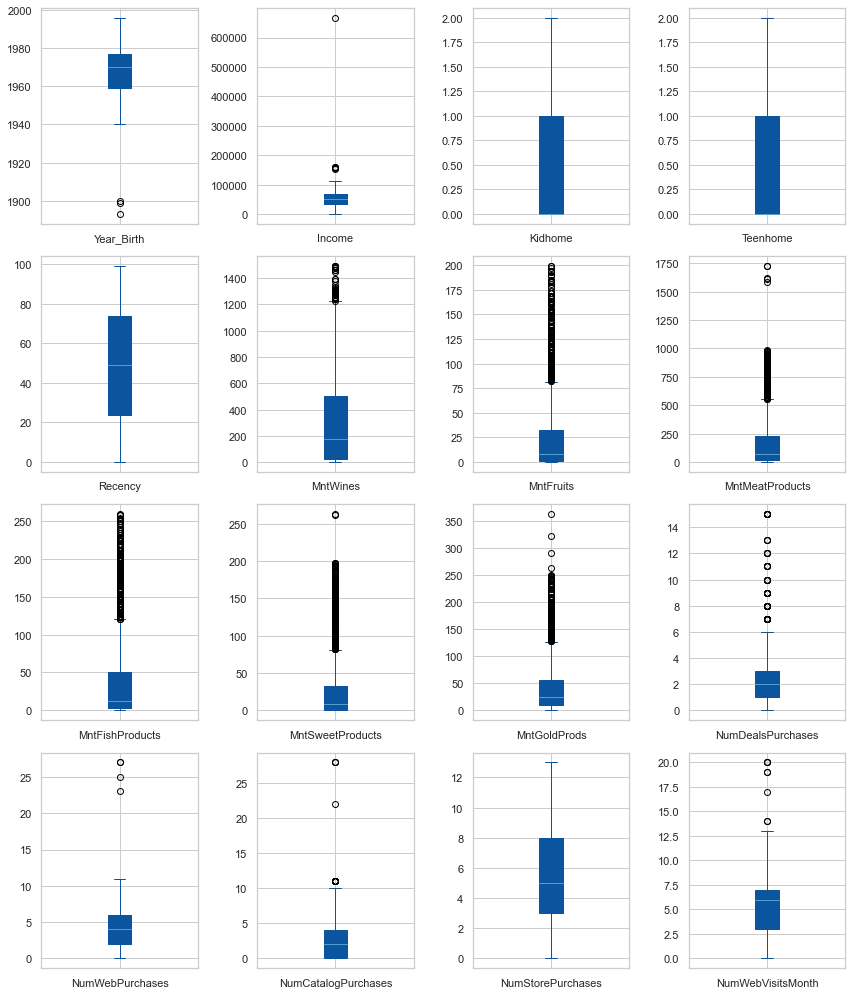

In [92]:
# Select columns to plot
df_colplot = df.select_dtypes(include=np.number).drop(columns=['ID',
                                                              'AcceptedCmp3',
                                                              'AcceptedCmp4',
                                                              'AcceptedCmp5',
                                                              'AcceptedCmp1',
                                                              'AcceptedCmp2',
                                                              'Response',
                                                              'Complain'])

# Plot 16 features
df_colplot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.tight_layout()

Xóa giá trị bất thường tại cột *Year_Birth*

In [93]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

### Feature engineering
Có thể chuyển đổi từ dữ liệu ban đầu thành những feature như sau:
 - *Dependents* (Tổng số người phụ thuộc trong 1 hộ gia đình, tức không có khả năng lao động): từ tổng của *Kidhome* and *Teenhome*
  - *Year_Customer* (Số năm trở thành khách hàng): từ *Dt_Customer*
  - *TotalMnt* (Tổng số tiền đã mua): từ tổng của feature chứa từ khóa "Mnt"
  - *TotalPurchases* (Tổng số lượng đơn hàng): từ tổng của feature chứa từ khóa "Purchases"
  - *TotalCampAccpt* (Tổng số chiến lược thành công): từ tổng của những feature chứa từ khóa "Cmp" và "Response"

In [94]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# The year become a customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total amount spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total purchase
pur_cols = [col for col in df.columns if 'Purchase' in col]
df['TotalPurchases'] = df[pur_cols].sum(axis=1)

# Total campaign accepted
camp_cols = [col for col in df.columns if 'Accepted' in col] + ['Response']
df['TotalCampAccpt'] = df[camp_cols].sum(axis=1)

# Take a view new features by IDs
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampAccpt']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampAccpt
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


### Correlations

Biểu diễn bằng Heatmap cho ta thấy được sự tương quan (correlation) giữ các thuộc tính (feature) với nhau. 

Màu đỏ nghĩa là tương quan dương (positive correlation), màu xanh nghĩa là tương quan âm (negative correlation) và màu trắng nghĩa là không có sự tương quan nào.
Quan sát heatmap được những nhóm (cluster) sau đây:
 - Nhóm thu nhập cao ("High Income" cluster):
     - Tương quan dương với lượng tiền chi trả  *('TotalMnt')* và số lượng đơn hàng *('TotalPurchases')*
 - Nhóm phụ thuộc ("Dependents" cluster):  
      - Tương quan âm với lượng tiền chi trả  *('TotalMnt')* và số lượng đơn hàng *('TotalPurchases')*
      - Tương quan dương với các đơn hàng khuyến mãi *('NumDealsPurchases')*
 - Nhóm marketing ("Advertising Campaign" cluster)
      - Tương quan dương với nhóm thu nhập cao và âm với nhóm còn phụ thuộc gia đình
      
Điểm bất thường:
   - Lượt xem website *('NumWebVisitsMonth')* lại không tương quan với số lượng mua đơn hàng *('NumWebPurchases')*
   - Lượt xem website *('NumWebVisitsMonth')* tương quan dương với đơn hàng khuyến mãi *('NumDealsPurchases')*
       - Nhận xét:
           - Sự khuyến mãi, giảm giá có hiệu quả đối với mua sắm

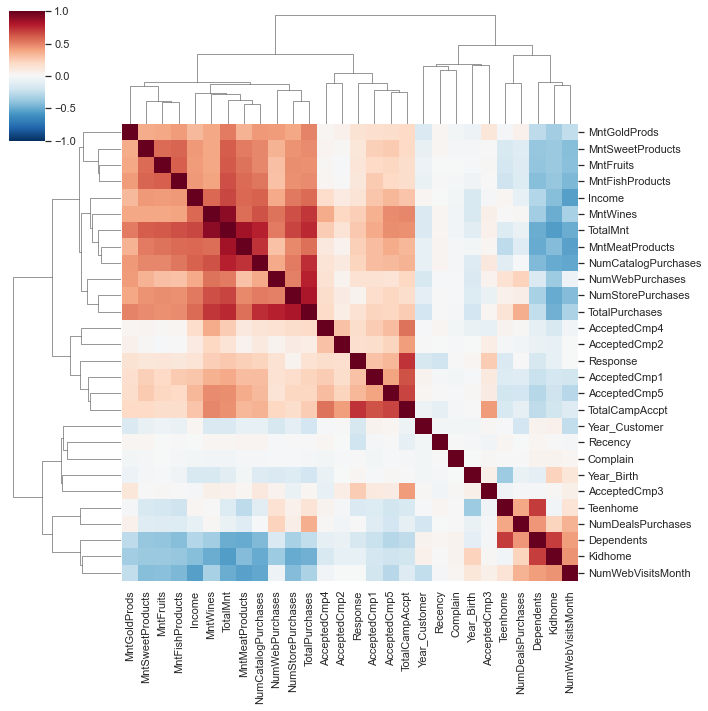

In [95]:
corr_df = df.drop(columns='ID').select_dtypes(include=np.number).corr()

sns.clustermap(corr_df, cmap='RdBu_r', vmin=-1, vmax=1);

Biễu diễn sự ảnh hưởng của thu nhập ('Income') với lượng chi trả ('TotalMnt')

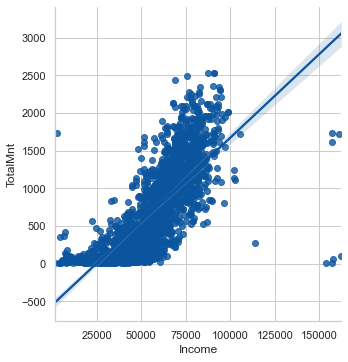

In [96]:
sns.lmplot(data=df[df['Income'] < 200000], x='Income', y='TotalMnt')
plt.show()

Biểu diễn sự ảnh hưởng của nhóm phụ thuộc ('Dependents') với lượng chi trả ('TotalMnt') và lượng mua từ khuyến mãi ('NumDealsPurchases')

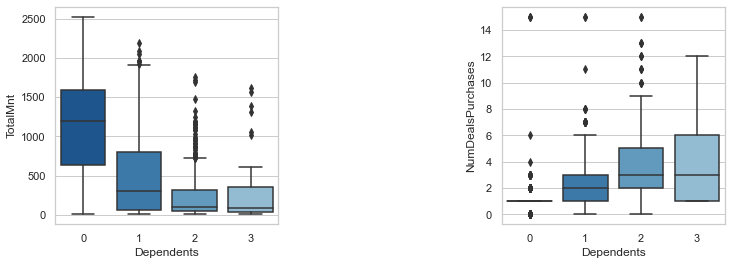

In [97]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(data=df, y='TotalMnt', x='Dependents', ax=ax[0])
sns.boxplot(data=df, y='NumDealsPurchases', x='Dependents')
f.subplots_adjust(wspace=1)
plt.show()

Biễu diễn sự ảnh hưởng của thu nhập ('Income') với chiến lược quảng cáo ('TotalCampAccpt')

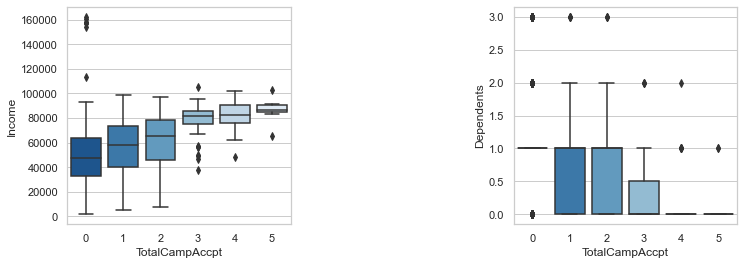

In [98]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(data=df[df['Income'] < 200000], y='Income', x='TotalCampAccpt', ax=ax[0])
sns.boxplot(data=df[df['Income'] < 200000], y='Dependents', x='TotalCampAccpt')
f.subplots_adjust(wspace=1)
plt.show()

Điểm bất thường:
   - Lượt xem website hàng tháng ('NumWebVisitsMonth') lại không tương quan với số lượng mua đơn hàng ('NumWebPurchases') và tương quan dương với đơn hàng khuyến mãi ('NumDealsPurchases')

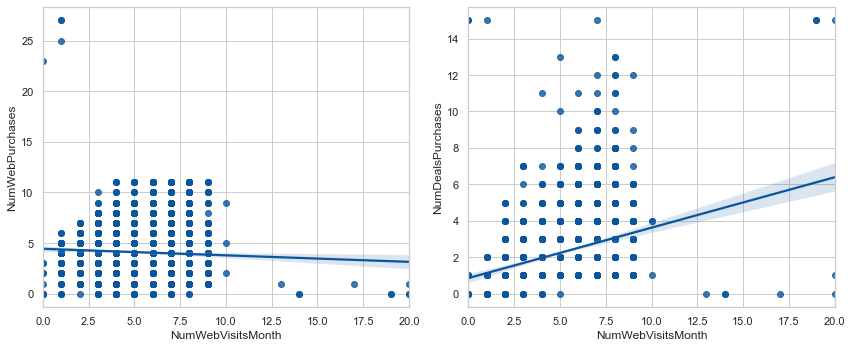

In [99]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,5))
sns.regplot(data=df[df['Income'] < 200000], y='NumWebPurchases', x='NumWebVisitsMonth', ax=ax1)
sns.regplot(data=df[df['Income'] < 200000], y='NumDealsPurchases', x='NumWebVisitsMonth', ax=ax2)
plt.tight_layout()
plt.show()

# Statical Analysis

### Những feature nào có tương quan đến số lượng đơn hàng mua trực tiếp tại cửa hàng?
Sử dụng mô hình Linear Regression với *NumStorePurchases* là đầu ra (target variable), sau đó dùng machine learning explainability để lấy thông tin từ những feature được sử dụng để thực hiện mô hình dự đoán, từ đó ta có thể đánh giá được độ tương quan thông qua p-value

Trươc tiên quan sát sự phân bố của số lượng đơn hàng mua trực tiếp tại cửa hàng ('NumStorePurchases')

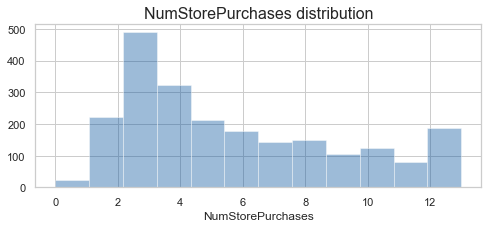

In [100]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.show()

Loại bỏ những feature không cần thiết
- Bỏ *ID* feature
- Bỏ *Dt_Customer*, vì đã có *Year_Customer*

In [101]:
df1 = df.drop(columns=['ID', 'Dt_Customer'])

Thực hiện encode bằng **OneHotEncoder** đối với dữ liệu danh mục (categorical features)

In [102]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features
cat = df1.select_dtypes(exclude=np.number)
print('Number of unique values of categorical features:\n', cat.nunique())

# use one hot coder
cat_fit = OneHotEncoder(sparse=False).fit(cat) # categories have not high cardinality
cat_enc = pd.DataFrame(cat_fit.transform(cat))
cat_enc.columns = cat_fit.get_feature_names(cat.columns)

#merge with numberic data
num = df1.drop(columns=cat.columns)
df2 = pd.concat([num, cat_enc], axis=1)
df2.head()

Number of unique values of categorical features:
 Education         5
Marital_Status    8
Country           8
dtype: int64


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampAccpt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,1190,15,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,577,18,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,251,11,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,11,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,91,8,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Chia 80% dữ liệu thành training và 20% thành test, dùng RMSE (Root mean square error) để đánh giá model
- Nhận xét:
  - RMSE nhỏ so với median của target, do đó model này khá ổn

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y = df2['NumStorePurchases']
X = df2.drop(columns='NumStorePurchases')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# predictions
pred = lr.predict(X_test)

# evaluate model using RMSE
print('Linear Regression RMSE: ', np.sqrt(mean_squared_error(y_test,pred)))

Linear Regression RMSE:  2.3509105355784058e-11


Xác định feature có ảnh hưởng lớn đến *NumStorePurchases* bằng thư viện **PermutationImportance**
Những feature đó là:
 - 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
 - Những feature còn lại không đáng kể

In [104]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

Tìm hiểu sự ảnh hưởng của mỗi feature với nhau bằng **SHAP values**
- Nhận xét:
 - Lượng mua trực tiếp tại cửa hàng tăng cùng với tổng đơn hàng 
 - Lượng mua trực tiếp tại cửa hàng giảm đối với lượng mua từ Catalog, Website, Deals
- Diễn giải:
 - Những người mua sắm nhiều nhất tại cửa hàng là những người ít xem qua Catalog, Website hoặc khuyến mãi


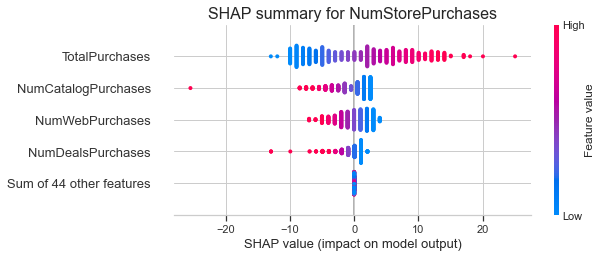

In [105]:
import shap

# calculate shap values 
ex = shap.Explainer(lr, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

### Nước nào hiện đang có tổng đơn hàng hơn các nước còn lại?
Lập đồ thị và quan sát lượng đơn hàng của 8 quốc gia:
 - Nhận xét:
  - Spain (SP) cao nhất
  - Mexico thấp nhất

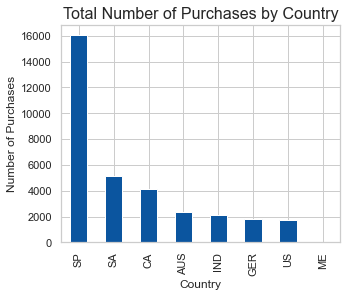

In [106]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

#### Có phải những người mua vàng trên mức trung bình trong 2 năm gần đây sẽ mua hàng nhiều hơn?
Vẽ biểu đồ để xem mối quan hệ giữa những người mua vàng ('MntGoldProds') và người mua tại cửa hàng ('NumStorePurchases')
- Nhận xét:
 - Giữa 2 feature có sự liên hệ với nhau, nhưng nó có ý nghĩa thống kê (statistically significant) không?

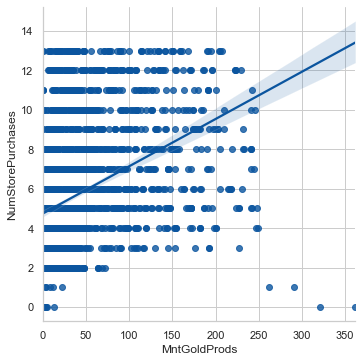

In [107]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df)
plt.show()

Dùng phương pháp **Kendall** (thuộc về non-parametric bởi vì MntGoldProducts không phải phân phối chuẩn và chứa outlier)
- Nhận xét:
 - Sau khi chạy code ta thấy có sự tương quan dương giữ *MntGoldProds* và *NumStorePurchases*

In [108]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


#### Có phải những người có bằng tiến sĩ và đã kết hôn có tương quan mạnh mẽ đối với việc mua mặt hàng cá (vì omega-3 tốt cho não bộ)?
So sánh *MntFishProducts* với những 'Married PhD' và với tất cả khách hàng khác
 - Nhận xét:
  - Những người có bằng tiến sĩ đã kết hôn ('Married PhD') chi ít hơn cho sản phẩm từ cá so với những người khác

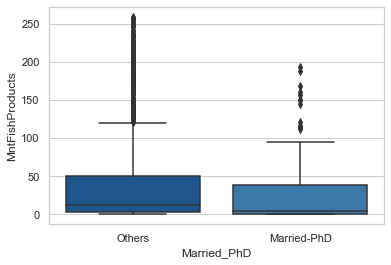

In [109]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Others', 0:'Others'})

# plot MntFishProducts between Married-PhD and others
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

In [110]:
# independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Others']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 3))

t-test p-value:  0.005


### Còn những nhân tố khác liên hệ đến lượng mua cá không?
Tương tự *NumStorePurchases*, chúng ta dùng mô hình linear regression với *MntFishProducts* là target variable, sau đó dùng machine learning explainability để lấy thông tin từ những feature được sử dụng để thực hiện mô hình dự đoán, từ đó ta có thể đánh giá được độ tương quan thông qua p-value

Trước tiên quan sát *MntFishProducts* qua biểu đồ dưới

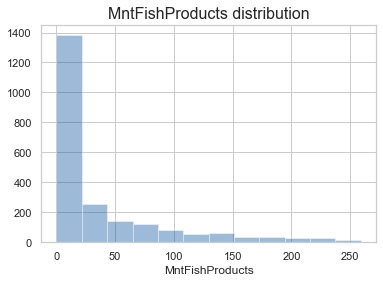

In [111]:
sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.show()

In [112]:
# isolate X and y variables, and perform train-test split
X = df2.drop(columns=['MntFishProducts', 'Married_PhD'])
y = df2['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.907813841096141e-13
Median value of target variable:  12.0


Xác định feature có ảnh hưởng lớn đến MntFishProducts qua thư viện **PermutationImportance**

Những feature đó là:
 - 'TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'
 - Còn lại không đáng kể

In [113]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Tìm hiểu sự ảnh hưởng của mỗi feature với nhau bằng SHAP values

- Nhận xét:
  - Tổng lượng chi tiêu cho cá tăng đồng thời cùng tổng chi tiêu ('TotalMnt')
  - Tổng lượng chi tiêu cho cá giảm cùng với lượng chi tiêu của rựu, vàng, trái cây, bánh kẹo ('MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits')
- Diễn giải:
 - Khách hàng mua nhiều cá là người chi tiêu ít cho sản phẩm khác


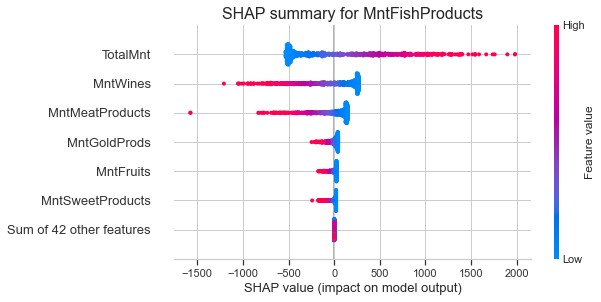

In [114]:
# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

# Data visualization

### Chiến lược marketing nào thành công nhất?

Biểu đồ tỉ lệ thành công của marketing
- Nhận xét:
 - Chiến dịch thành công nhất là chiến dịch gần đây nhất ('Response')

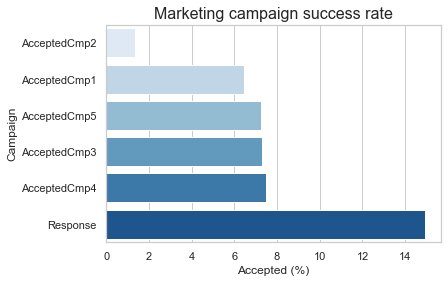

In [115]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

### Khách hàng có đặc điểm như thế nào?
- Nhân khẩu học: Khách hàng là trung bình của...
  - Sinh năm 1969
  - Trở thành khách hàng năm 2013
  - Có thu nhập khoảng $52.000 mỗi năm
  - Có 1 người phụ thuộc
  - Đã mua hàng từ công ty trong 49 ngày qua

In [116]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampAccpt']

# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


### Sản phẩm nào đang hoạt động tốt nhất?

Khách hàng trung bình đã chi ...
- $ 25-50 cho Trái cây, Kẹo, Cá hoặc các sản phẩm vàng
- Hơn $$ 160 đối với các sản phẩm từ thịt
- Hơn $$ 300 cho rượu vang
- Tổng hơn $$ 600 

Sản phẩm hoạt động tốt nhất:
- Rượu vang
- Tiếp theo là các loại thịt

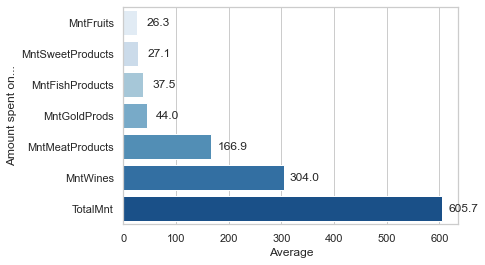

In [117]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

### Những kênh nào đang hoạt động kém hiệu quả?

Kênh: Khách hàng trung bình ...
- Đã chấp nhận ít hơn 1 chiến dịch quảng cáo
- Thực hiện 2 giao dịch mua, 2 mua trên catalog, 4 mua trên web và 5 mua tại cửa hàng
- Tổng số trung bình là 14 lần mua
- Đã truy cập trang web 5 lần

Các kênh hoạt động kém:
- Chiến dịch quảng cáo
- Tiếp theo là các đợt khuyến mãi và catalog

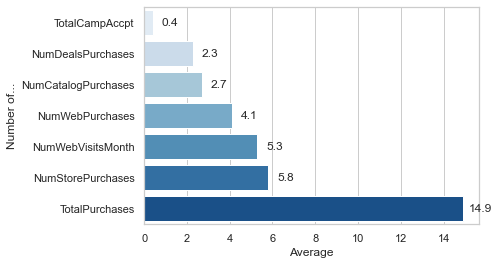

In [118]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

# Kết Luận

### Tóm tắt tình hình chung và đề xuất để cải thiện chiến dịch marketing:

Chiến dịch thành công nhất là chiến dịch gần đây nhất ở Mexico (> 60%)
 - Đề xuất: Tiến hành các chiến dịch quảng cáo trong tương lai bằng cách sử dụng cùng một mô hình được triển khai mới nhất ở Mexico
 
Việc thành công marketing có tương quan dương với thu nhập và tương quan âm với việc có con hoặc thanh thiếu niên
 - Đề xuất: Tạo hai luồng marketing nhắm vào hai đối tượng, một luồng nhằm vào các cá nhân có thu nhập cao không có trẻ em / thanh thiếu niên và một luồng khác nhắm vào các cá nhân có thu nhập thấp hơn có trẻ em / thanh thiếu niên
 
Các sản phẩm thành công nhất là rượu vang và thịt
 - Đề xuất: Tập trung marketing các mặt hàng ít phổ biến hơn
 
Các kênh hoạt động kém là khuyến mãi và catalog, các kênh hoạt động tốt nhất là mua hàng trên web và tại cửa hàng
 - Đề xuất: Tập trung marketing vào các kênh thành công hơn, để tiếp cận nhiều khách hàng hơn